##Theoretical Questions :-

###QUE.1 Can we use Bagging for regression problems?

###ANS.1 Yes, **Bagging** (Bootstrap Aggregating) can definitely be used for **regression problems**. In fact, Bagging is often applied to regression tasks, not just classification.

Here’s how it works for regression:
1. **Multiple models** (e.g., decision trees) are trained on different subsets of the data generated by bootstrapping (random sampling with replacement).
2. Each individual model makes its own prediction for new data.
3. The final prediction is typically the **average** of the predictions from all the models.

For example, **Random Forests** is a popular ensemble method for regression that uses bagging with decision trees as the base learners. It aggregates the predictions by averaging them to get the final output.

So, Bagging can help reduce variance and improve the stability of regression models, particularly when using models like decision trees, which tend to have high variance.

###QUE.2  What is the difference between multiple model training and single model training?

###ANS.2 The main difference between **multiple model training** and **single model training** lies in how the models are used and the training approach:

### **Single Model Training**:
- **Definition**: In single model training, you train a single machine learning model to solve a specific problem or task.
- **Process**: The training process involves feeding data into a single algorithm or architecture, optimizing its parameters based on the training data, and evaluating it on validation or test data.
- **Use Case**: This approach is commonly used for tasks where a single model is sufficient to perform the desired function, such as classification, regression, or object detection.
- **Pros**:
  - Simpler and faster to implement.
  - Easier to deploy and maintain.
- **Cons**:
  - May not perform well if the task requires complex or multi-faceted understanding (e.g., in the case of multiple languages, different data types, or highly complex tasks).

### **Multiple Model Training**:
- **Definition**: Multiple model training involves training multiple models simultaneously or sequentially, either independently or in conjunction with each other, to solve a particular problem.
- **Process**: The models might be trained on different subsets of data, use different algorithms, or have different architectures. The outputs from multiple models can be combined in various ways, such as through voting, stacking, or ensemble methods.
- **Use Case**: Common in situations where different models specialize in different aspects of a problem, or when combining multiple models can increase accuracy and robustness. For example, ensemble methods like Random Forests or XGBoost, which combine several decision trees, or multi-task learning, where different models are trained for related tasks.
- **Pros**:
  - Can improve accuracy and performance by leveraging the strengths of multiple models.
  - Better suited for complex tasks or tasks with diverse data types (e.g., images, text, and time series data).
- **Cons**:
  - More computationally expensive and complex to manage.
  - Requires more resources for training, tuning, and deployment.

In short, **single model training** is straightforward and works well for simpler tasks, while **multiple model training** can offer enhanced performance by combining the strengths of different models but is more complex and resource-intensive.

###QUE.3 Explain the concept of feature randomness in Random Forest.


###ANS.3 In a Random Forest, **feature randomness** refers to the process of randomly selecting a subset of features (or variables) at each decision tree node, rather than considering all features when splitting a node. This randomness is a key element in the construction of Random Forests and contributes to its power and effectiveness.

Here's how it works:

1. **Training the Decision Trees**: Random Forest builds multiple decision trees, where each tree is trained on a random subset of the training data (through bootstrapping, meaning sampling with replacement).

2. **Random Feature Selection**: At each node of a tree, instead of considering all the available features to decide the best split, only a random subset of features is considered. This is typically a smaller number than the total number of features, often the square root of the total number of features for classification tasks.

3. **Why It Works**: The idea behind feature randomness is to introduce diversity among the individual trees. By limiting the number of features each tree can consider, it reduces the correlation between the trees. This helps prevent overfitting and improves the generalization ability of the model. It also makes the model more robust, as individual trees might overfit on certain features, but the ensemble (the Random Forest) will average out errors.

4. **Overall Effect**: Feature randomness helps Random Forests become a more powerful model because it combines the strength of multiple, diverse decision trees, each focusing on different aspects of the data. This "diversity" in the trees leads to a more accurate and stable model when predictions are made.

In summary, feature randomness is a technique that helps enhance the performance and robustness of a Random Forest model by randomly selecting a subset of features at each split in each decision tree, leading to less overfitting and improved generalization.


###QUE.4 What is OOB (Out-of-Bag) Score?

###ANS. The **Out-of-Bag (OOB) score** is a concept used in ensemble learning methods, particularly in **Random Forests**. It provides an estimate of the model’s performance without needing a separate validation set.

### How OOB Score Works:

1. **Bootstrap Sampling**: In Random Forests, each tree is trained on a bootstrapped subset of the data (i.e., a random sample with replacement). For each tree, roughly **one-third** of the data points are not used for training that specific tree. These points are called **out-of-bag**.

2. **Prediction with OOB Data**: Once all trees are trained, the out-of-bag data points (those not included in the training set for a specific tree) are used to test the model. This means that for each data point, you can gather predictions from all the trees where that data point was not included in the training process.

3. **OOB Score Calculation**: The OOB score is computed by averaging the accuracy of the predictions made for the out-of-bag data across all trees. It is essentially an internal cross-validation method.

### Why Use OOB Score?

- **No Need for a Validation Set**: Since OOB provides a performance estimate from data that wasn't used in training the trees, you don't need a separate validation set. This is particularly useful when data is limited.
- **Efficient**: It helps make the most of the available data by using it both for training and testing.
- **Less Bias**: It helps to get a more unbiased estimate of model performance.

### Formula:
For classification, the OOB score can be computed as:
\[
\text{OOB Accuracy} = \frac{\text{Number of Correct Predictions on OOB Data}}{\text{Total Number of OOB Predictions}}
\]

In summary, the OOB score is a valuable technique for evaluating the performance of a Random Forest model without needing a dedicated test set.

###QUE.5 How can you measure the importance of features in a Random Forest model?

###ANS.5 In a Random Forest model, you can measure the importance of features using various methods. The most common and straightforward ways are:

### 1. **Mean Decrease Impurity (Gini Impurity or Entropy)**
   - This is the most widely used method for feature importance in Random Forests.
   - **How it works:** Each tree in the Random Forest splits the data based on certain features. When a feature is used to split the data, the impurity (Gini Impurity or Entropy) is reduced. The more a feature helps to reduce the impurity (i.e., the more "pure" the nodes become), the more important that feature is.
   - **Output:** A higher decrease in impurity indicates a higher importance of the feature.
   
   In Python's `sklearn`, you can get feature importance using `model.feature_importances_` after fitting the Random Forest model:
   ```python
   from sklearn.ensemble import RandomForestClassifier
   
   model = RandomForestClassifier()
   model.fit(X_train, y_train)
   feature_importances = model.feature_importances_
   ```

### 2. **Mean Decrease Accuracy (Permutation Importance)**
   - **How it works:** This method involves randomly shuffling the values of each feature and observing the change in model performance. If a feature is important, permuting its values will lead to a significant drop in the model's accuracy. If permuting a feature does not affect the model’s performance, the feature is less important.
   - **Implementation:** You can use permutation importance in Python using libraries like `sklearn` or `eli5`. This method is model-agnostic and can be used for any machine learning model.
   
   Example using `sklearn`:
   ```python
   from sklearn.inspection import permutation_importance
   
   result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
   perm_importance = result.importances_mean
   ```

### 3. **SHAP (SHapley Additive exPlanations) Values**
   - SHAP values provide a more detailed and interpretable way to understand the contribution of each feature to individual predictions. This method is based on cooperative game theory and calculates how much each feature contributes to the prediction relative to the baseline.
   - **How it works:** It calculates the contribution of each feature for each prediction by considering all possible permutations of features. The results are averaged over all predictions to provide a global interpretation.
   - **Implementation:** You can use the `shap` library to compute SHAP values for a Random Forest model.
   
   Example using `shap`:
   ```python
   import shap
   
   explainer = shap.TreeExplainer(model)
   shap_values = explainer.shap_values(X_train)
   shap.summary_plot(shap_values, X_train)
   ```

### 4. **Tree-Based Feature Importance (using Sklearn's `RandomForestClassifier`/`RandomForestRegressor`)**
   - In Random Forests, each individual tree calculates feature importance based on how often a feature is used in splits and how much it helps reduce impurity.
   - **How it works:** The average feature importance across all trees in the forest is calculated and used as a global measure of feature importance.

### Summary
- **Mean Decrease Impurity (Gini/Entropy)**: Measures how often a feature is used for splits, weighted by the impurity reduction.
- **Permutation Importance (Mean Decrease Accuracy)**: Measures the effect of random feature shuffling on model performance.
- **SHAP Values**: Provides detailed contributions of each feature to each individual prediction.

Each of these methods has its strengths, and the best one depends on the context and what you need from the feature importance (e.g., global vs. local interpretability).

###QUE.6 Explain the working principle of a Bagging Classifier?

###ANS.6 The **working principle of a Bagging Classifier** (short for **Bootstrap Aggregating**) is an ensemble method that improves the performance and stability of machine learning algorithms, particularly those that are sensitive to variations in the data, like decision trees.

Here’s how it works:

1. **Bootstrapping**:
   - First, multiple subsets of the training data are created by **random sampling** with replacement (this is called **bootstrapping**).
   - Each subset will be of the same size as the original dataset, but some data points may appear multiple times, while others may be left out.

2. **Model Training**:
   - A separate classifier (often a decision tree, but it can be any machine learning model) is trained on each of the bootstrapped datasets.
   - The idea is that by training multiple models on different subsets of data, each model learns a slightly different representation of the data.

3. **Prediction**:
   - For classification tasks, when it comes time to make a prediction on new, unseen data, each model (trained on different subsets) makes its own prediction.
   - **Majority Voting** is used to combine the predictions of all the individual models. The final predicted class is the one that gets the most votes from all the classifiers.

4. **Result**:
   - Bagging reduces variance and helps prevent overfitting because it averages out the predictions of the individual models. By training on different data subsets, bagging effectively smoothens out any noise or overfitting tendencies that might arise from any single model.

### Key Points:
- **Reduction in variance**: By using multiple models and averaging their predictions, Bagging reduces the overall variance, making the model more robust to fluctuations in the data.
- **Improvement over weak models**: It is particularly useful when the base model is a weak learner (e.g., decision trees).
- **Example**: A common implementation of Bagging is **Random Forests**, where decision trees are used as base models and combined using Bagging.

Overall, the Bagging Classifier leverages the strength of multiple classifiers to provide more accurate and stable predictions.

###QUE.7 How do you evaluate a Bagging Classifier’s performance?

###ANS.7 Evaluating the performance of a Bagging Classifier (or any machine learning model) generally involves several key steps. Here are the common methods:

### 1. **Accuracy**
   - **Definition**: Accuracy is the proportion of correctly predicted instances out of the total instances.
   - **How to use**: Calculate the percentage of correct predictions versus the total number of predictions made. While it's a common metric, it may not be sufficient if the dataset is imbalanced.
   - **Formula**:
     \[
     \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} \times 100
     \]

### 2. **Confusion Matrix**
   - **Definition**: The confusion matrix is a table that compares the predicted labels to the actual labels, providing a detailed view of the classifier's performance. It helps evaluate the classifier’s performance in different classes (for multi-class classification).
   - **How to use**: From the confusion matrix, you can derive metrics like precision, recall, and F1-score.
   - **Components**: True positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

### 3. **Precision, Recall, and F1-Score**
   - **Precision**: The proportion of positive predictions that were actually correct.
     \[
     \text{Precision} = \frac{TP}{TP + FP}
     \]
   - **Recall**: The proportion of actual positives that were correctly predicted.
     \[
     \text{Recall} = \frac{TP}{TP + FN}
     \]
   - **F1-Score**: The harmonic mean of precision and recall, balancing the two metrics.
     \[
     \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
     \]

### 4. **Cross-Validation**
   - **Definition**: Cross-validation involves splitting the dataset into multiple subsets, training the model on some subsets and testing on the remaining ones to evaluate performance more robustly.
   - **How to use**: Commonly, **k-fold cross-validation** is used where the dataset is divided into **k** parts, and each part is used as a test set while the model is trained on the remaining k-1 parts. The average performance across all folds is then reported.
   - **Why it's useful**: It reduces overfitting by giving you a better estimate of model performance on unseen data.

### 5. **Out-of-Bag (OOB) Error Estimate**
   - **Definition**: One of the unique features of Bagging classifiers (such as Random Forest) is the use of out-of-bag (OOB) samples. When training a Bagging model, each base model is trained on a bootstrap sample of the data, meaning that some samples are left out of the training set for each base model. These left-out samples can be used to estimate the generalization error (OOB error).
   - **How to use**: The OOB error can be computed similarly to cross-validation, where the predictions for each OOB sample are aggregated to estimate the error.
   - **Why it's useful**: OOB error gives a good approximation of model performance without needing a separate validation set.

### 6. **Receiver Operating Characteristic (ROC) Curve and AUC**
   - **ROC Curve**: A graphical plot that shows the performance of a classifier at all classification thresholds. It is a plot of the true positive rate (sensitivity) versus the false positive rate (1 - specificity).
   - **AUC (Area Under the Curve)**: The area under the ROC curve. The higher the AUC, the better the model's ability to distinguish between the classes.

### 7. **Learning Curves**
   - **Definition**: Learning curves plot the performance of the model (typically accuracy or error rate) as a function of training size or training time.
   - **How to use**: By plotting the training and validation errors against training size, you can detect overfitting, underfitting, or whether the model needs more data.

### 8. **Model Hyperparameters Tuning**
   - **Definition**: Evaluating performance after tuning hyperparameters like the number of base models (estimators), the number of features considered in each model, and the maximum depth of trees (for decision tree-based bagging classifiers).
   - **How to use**: This is typically done through grid search or random search with cross-validation to find the optimal set of hyperparameters for better performance.

---

By using these methods together, you can comprehensively evaluate the performance of a Bagging Classifier and gain insights into its strengths and weaknesses.

###QUE.8 How does a Bagging Regressor work?

###ANS.8 A **Bagging Regressor** is an ensemble learning method that uses the **bagging (Bootstrap Aggregating)** technique to improve the accuracy and stability of regression models. It works by combining predictions from multiple models to reduce variance and prevent overfitting. Here’s how it works step-by-step:

1. **Bootstrap Sampling (Data Sampling)**:
   - The algorithm begins by creating multiple subsets of the original training data. Each subset is created by randomly sampling data points **with replacement** from the original dataset. This means some data points can be repeated in a subset, while others may be left out.

2. **Training Multiple Models**:
   - A regression model (e.g., decision trees, linear regression) is trained on each of these bootstrap samples. These models can be the same type (e.g., all decision trees), but since the training data for each model is different, each model might learn slightly different patterns.

3. **Prediction**:
   - Once all the models are trained, predictions are made by each individual model. Since Bagging is an ensemble method, predictions from multiple models are averaged to get the final output. In the case of regression, the final prediction is the **average of the individual model predictions**.

4. **Reduction of Variance**:
   - By combining predictions from several models trained on different data subsets, Bagging reduces the variance of the model. Each individual model may have high variance (due to overfitting), but averaging the predictions of many models helps to smooth out the errors, resulting in a more stable and robust prediction.

### Key Benefits of Bagging Regressor:
- **Reduces overfitting**: By averaging the results from multiple models, Bagging helps in reducing overfitting, especially when the base model is prone to it, like decision trees.
- **Improves accuracy**: Bagging usually results in more accurate predictions compared to a single model.
- **Works well with high variance models**: It is particularly effective for models that have high variance, such as decision trees.

### Example:
Imagine you have a dataset with housing prices, and you want to predict the price of a house given various features (e.g., size, location). By applying Bagging, you would create multiple subsets of the data, train a regression model (like decision trees) on each subset, and then average the predictions from all the models to get the final predicted price.

In practice, one popular implementation of a Bagging Regressor is the **BaggingRegressor** in scikit-learn, where a default base model is typically a decision tree regressor.

Does that clarify how it works for you? Let me know if you'd like more details!

###QUE.9 What is the main advantage of ensemble techniques?

###ANS.9 The main advantage of ensemble techniques is that they combine multiple models to make better predictions than any single model on its own. By leveraging the strengths and mitigating the weaknesses of individual models, ensemble methods can reduce errors and improve overall performance, leading to better accuracy, generalization, and robustness.

There are several specific benefits:
1. **Improved accuracy**: Combining models typically leads to better overall performance, as the weaknesses of one model can be counterbalanced by others.
2. **Reduction of overfitting**: By using different models, ensemble methods can reduce the risk of overfitting compared to a single complex model.
3. **Stability**: They can make predictions that are less sensitive to small changes in the data, leading to more consistent results.
4. **Handling biases**: Different models might have different biases, and ensembles can help correct these by combining diverse perspectives.

Popular ensemble techniques include **bagging** (e.g., Random Forest), **boosting** (e.g., Gradient Boosting, AdaBoost), and **stacking**. Each has its own way of combining predictions to improve performance.

###QUE.10 What is the main challenge of ensemble methods?

The main challenge of ensemble methods is **overfitting**, particularly when the base models are complex. While ensemble methods, like bagging and boosting, aim to improve model performance by combining multiple learners, they can still lead to overfitting in certain cases, especially when:

1. **Base models are overly complex**: If each individual model in the ensemble is highly complex (e.g., deep decision trees), the ensemble might learn too much from the training data, capturing noise rather than general patterns.
   
2. **Too many base models**: Including too many base models without sufficient regularization can cause the ensemble to overfit, particularly if the models are not diverse enough.

3. **Poor generalization**: If the models in the ensemble are not diverse or are highly correlated, the ensemble may not improve much over a single model, and the predictions may still be prone to overfitting.

To mitigate this, strategies like cross-validation, proper model regularization, and ensuring diversity among the base models are typically employed.

###QUE.11 Explain the key idea behind ensemble techniques?

###ANS.11 Ensemble techniques are machine learning methods that combine multiple individual models to improve the overall performance of a predictive system. The key idea behind ensemble techniques is that by combining the strengths of different models, we can reduce the risk of errors and increase accuracy, robustness, and generalization ability compared to using a single model.

The main principles behind ensemble methods include:

1. **Diversity of Models**: By using different models (e.g., decision trees, neural networks, etc.) or variations of the same model (e.g., with different training data or hyperparameters), ensemble methods create diversity, which helps in making more accurate predictions.

2. **Aggregation of Predictions**: Once different models are trained, their predictions are aggregated in some way to form a final decision. Common methods of aggregation include:
   - **Voting**: For classification tasks, each model "votes" on the predicted class, and the majority vote becomes the final prediction (e.g., in Random Forests).
   - **Averaging**: For regression tasks, predictions from all models are averaged to form a final result (e.g., in Bagging methods like Random Forest).

3. **Reduction of Overfitting**: Ensembles can help reduce the variance and bias in the model. They smooth out the errors of individual models, leading to a more robust overall model. This helps prevent overfitting to the training data.

4. **Improved Performance**: By combining multiple models, ensemble methods often lead to better performance in terms of accuracy, precision, and recall, especially in complex or noisy data scenarios.

Common types of ensemble techniques include:
- **Bagging**: Builds multiple models independently (e.g., Random Forest).
- **Boosting**: Builds models sequentially, with each new model focusing on the errors made by the previous one (e.g., AdaBoost, Gradient Boosting).
- **Stacking**: Combines predictions from different models by training a meta-model on the outputs of the base models.

Overall, the strength of ensemble methods lies in their ability to leverage multiple models to enhance prediction accuracy and resilience.

###QUE.12 What is a Random Forest Classifier?

###QUE.12 A **Random Forest Classifier** is an ensemble learning algorithm used for classification tasks in machine learning. It builds multiple decision trees during training and merges their outputs to make a final classification decision. The main idea behind a random forest is to combine the results of several decision trees to improve accuracy and prevent overfitting, which is common in single decision trees.

Here’s a breakdown of how it works:

1. **Bootstrap Sampling**: The algorithm generates multiple subsets of the training data by randomly selecting samples with replacement. This technique is called *bootstrap aggregating* (or *bagging*).

2. **Decision Trees**: For each subset, a decision tree is trained. However, instead of considering all features at each node, only a random subset of features is considered to split each node. This helps in reducing the correlation between the individual trees and increases diversity within the forest.

3. **Voting**: After the trees are built, each tree makes its own prediction for the class label of a sample. The Random Forest Classifier then takes a *majority vote* from all the trees to determine the final class label for the sample.

### Advantages:
- **Robustness**: Random forests are less prone to overfitting than a single decision tree.
- **Accuracy**: They typically perform well on both small and large datasets.
- **Feature Importance**: Random Forest can also give insights into the importance of features used in making predictions.

### Disadvantages:
- **Complexity**: The model can be more computationally expensive to train and slower to predict because it involves many decision trees.
- **Interpretability**: Unlike a single decision tree, a random forest is harder to interpret because it combines many trees.

In short, a Random Forest Classifier is a powerful tool for classification problems, leveraging multiple decision trees to create more accurate and stable predictions.

###QUE.13 What are the main types of ensemble techniques?

###ANS.13 Ensemble techniques combine multiple models to improve overall performance by leveraging their collective strengths. The main types of ensemble techniques in machine learning are:

### 1. **Bagging (Bootstrap Aggregating)**
   - **Definition**: Bagging involves training multiple models (typically of the same type) on different random subsets of the training data and then combining their predictions.
   - **Key Characteristics**:
     - Models are trained independently on different bootstrapped subsets of the data.
     - The final prediction is made by aggregating the individual models’ predictions, often through majority voting (for classification) or averaging (for regression).
   - **Example**: **Random Forests** (a bagging method using decision trees).
   
### 2. **Boosting**
   - **Definition**: Boosting builds models sequentially, where each model attempts to correct the errors made by the previous ones.
   - **Key Characteristics**:
     - Models are trained one at a time, with each subsequent model focusing more on the instances that were misclassified by the previous model.
     - The final prediction is typically a weighted combination of all models.
   - **Examples**:
     - **AdaBoost** (Adaptive Boosting)
     - **Gradient Boosting** (including **XGBoost**, **LightGBM**, and **CatBoost**)

### 3. **Stacking (Stacked Generalization)**
   - **Definition**: Stacking involves training multiple models (called base models) on the same dataset and then using another model (called a meta-model or blender) to combine the predictions of the base models.
   - **Key Characteristics**:
     - The base models can be of different types (e.g., decision trees, support vector machines, etc.).
     - The meta-model learns how to best combine the predictions from the base models to improve overall performance.
   - **Example**: Stacking can combine models like Random Forests, Logistic Regression, and Neural Networks, and then use another model (like a logistic regression) to make the final prediction.

### 4. **Voting**
   - **Definition**: Voting is a simple ensemble technique where multiple models (often of different types) make predictions, and the final prediction is determined by a majority vote (for classification) or averaging (for regression).
   - **Key Characteristics**:
     - **Hard Voting**: Each model votes for a class label, and the class with the majority of votes is chosen.
     - **Soft Voting**: Models predict class probabilities, and the final prediction is based on the average probability for each class.
   - **Example**: Combining predictions from a Random Forest, a Logistic Regression, and a Support Vector Machine.

### 5. **Bagged Boosting**
   - **Definition**: A hybrid technique combining both bagging and boosting strategies.
   - **Key Characteristics**:
     - Models are built with boosting, but the data is sampled with bagging methods to improve diversity.
     - This can provide a balance between the strengths of both methods.
   - **Example**: **Gradient Boosting with Random Forest as base learners**.

---

### Summary:

- **Bagging** reduces variance by averaging predictions (e.g., Random Forest).
- **Boosting** reduces bias by focusing on hard-to-classify instances (e.g., AdaBoost, Gradient Boosting).
- **Stacking** combines multiple model predictions using a meta-model (e.g., stacking decision trees with logistic regression).
- **Voting** combines predictions based on majority rule or probabilities (e.g., majority voting between models).

###QUE.14 What is ensemble learning in machine learning?


###ANS.14 **Ensemble learning** in machine learning is a technique where multiple models (also called "learners") are trained to solve the same problem, and their predictions are combined to produce a final result. The main goal of ensemble learning is to improve the performance and robustness of a machine learning model by leveraging the strengths of several individual models, rather than relying on a single model.

### Key Concepts:
- **Combining Multiple Models**: Ensemble learning combines multiple models to make a final decision, often leading to better accuracy and generalization than individual models.
- **Diversity of Models**: The models in an ensemble may be of the same type (e.g., decision trees) or different types (e.g., decision trees, support vector machines, and neural networks), and they are combined in a way that improves overall prediction performance.

### Advantages of Ensemble Learning:
1. **Improved Accuracy**: By combining multiple models, ensemble learning can produce more accurate predictions than any single model.
2. **Reduced Overfitting**: Ensemble methods often reduce the risk of overfitting compared to individual models, especially when using diverse models.
3. **Better Generalization**: Ensembles help in improving the model's ability to generalize to new, unseen data.
4. **Robustness**: It can be more robust to noisy data and outliers.

### Types of Ensemble Learning:
- **Bagging**: Models are trained independently on different subsets of the training data, and the final prediction is made by aggregating the results (e.g., Random Forest).
- **Boosting**: Models are trained sequentially, with each model trying to correct the mistakes of the previous one (e.g., AdaBoost, Gradient Boosting).
- **Stacking**: Multiple different models are trained, and a meta-model is used to combine their predictions (e.g., using a logistic regression model to combine predictions from decision trees, SVMs, and others).
- **Voting**: Multiple models are used, and the final prediction is made by majority voting (for classification) or averaging (for regression).

### Common Ensemble Methods:
- **Random Forest** (bagging with decision trees)
- **AdaBoost** (boosting with weak learners)
- **Gradient Boosting** (sequentially improving models by focusing on errors)
- **XGBoost** / **LightGBM** / **CatBoost** (efficient implementations of gradient boosting)
- **Voting Classifier** (simple voting among different models)

### Summary:
Ensemble learning is a powerful technique in machine learning that combines the predictions of multiple models to improve accuracy, reduce overfitting, and increase robustness. It works by capitalizing on the strength of different models to create a more reliable and accurate predictive system.

###QUE.15 When should we avoid using ensemble methods?

###ANS.15 While ensemble methods are powerful tools in machine learning, there are certain scenarios where their use might not be ideal. Here are some situations when you might want to avoid using ensemble methods:

### 1. **When the Problem is Simple**
   - **Scenario**: If you are working on a relatively simple problem where a single model (e.g., a decision tree or logistic regression) can already perform well and achieve high accuracy, ensemble methods might not add much value.
   - **Reason to Avoid**: Ensemble methods add complexity and computational cost, which may not be justified if a simple model is already giving good performance.

### 2. **When Computational Resources are Limited**
   - **Scenario**: Ensemble methods, especially those like **Random Forests** and **Boosting**, can be computationally expensive because they involve training multiple models.
   - **Reason to Avoid**: If you have limited computational resources (e.g., memory or processing power) or if you're working with large datasets, ensemble methods may not be efficient. They can significantly increase training time and require more memory.

### 3. **When Interpretability is Critical**
   - **Scenario**: If you need a model that is easy to interpret and explain, such as in regulated industries (e.g., healthcare, finance), simple models like **decision trees** or **logistic regression** are preferred.
   - **Reason to Avoid**: Ensemble methods like **Random Forests** and **Gradient Boosting** involve combining multiple models, which can make the final model difficult to interpret. This is problematic when you need clear, understandable reasoning for the model’s decisions.

### 4. **When the Data is Small or Noisy**
   - **Scenario**: If you have a small dataset or noisy data, ensemble methods might overfit or fail to generalize well.
   - **Reason to Avoid**: Ensemble methods like **Boosting** are sensitive to noisy data and can easily overfit when there's not enough data to create diverse and reliable models. In small datasets, even bagging methods might not reduce variance effectively.

### 5. **When Model Simplicity and Speed Matter**
   - **Scenario**: In real-time applications or systems where speed and simplicity are paramount (e.g., some embedded systems or mobile applications), using a complex ensemble method might not be feasible.
   - **Reason to Avoid**: Ensemble methods like **Boosting** or **Random Forests** require significant time for training and prediction. If the problem demands fast response times or low-latency predictions, a simpler model may be preferable.

### 6. **When Overfitting is a Concern**
   - **Scenario**: Even though ensemble methods help to reduce overfitting in many cases, certain types, like **Boosting** (especially **AdaBoost**), can still overfit when the models are too complex or the data is noisy.
   - **Reason to Avoid**: If overfitting is a major concern, and you don’t have enough data to properly train multiple models, using an ensemble method could exacerbate this issue, especially if model tuning is not carefully done.

### 7. **When you Already Have a High-performing Model**
   - **Scenario**: If you already have a high-performing individual model that gives satisfactory results, adding ensemble methods might not provide substantial improvement.
   - **Reason to Avoid**: Ensemble methods may only offer marginal improvements over well-performing single models, especially in cases where the base model is already highly optimized.

### Summary:
Avoid ensemble methods in situations where:
- The problem is simple, and a single model suffices.
- Computational resources (memory, time) are limited.
- Interpretability is crucial.
- You have small or noisy data.
- Speed and simplicity are prioritized (e.g., real-time systems).
- Overfitting is a significant concern.
- You already have a high-performing model.

In these cases, simpler models might be more appropriate and more efficient than complex ensemble techniques.

###QUE.16 How does Bagging help in reducing overfitting?

###ANS.16 Bagging (Bootstrap Aggregating) helps reduce overfitting by combining the predictions of multiple models trained on different subsets of the training data. Here's how it works and how it helps reduce overfitting:

1. **Bootstrap Sampling**: In bagging, multiple subsets of the data are created by randomly sampling with replacement from the training dataset (this is called bootstrap sampling). Each subset is used to train a separate model, typically a weak learner like a decision tree.

2. **Ensemble of Models**: Instead of using a single model, bagging builds an ensemble of models. Each model in the ensemble is trained on a slightly different dataset, which introduces diversity among the models.

3. **Averaging or Majority Voting**: After training, the predictions from all the models are combined. For regression tasks, predictions are typically averaged, while for classification tasks, majority voting is used. This means the final prediction depends on the collective wisdom of the models rather than one model alone.

### How Bagging Reduces Overfitting:
- **Reduces Variance**: Bagging reduces the variance of predictions. When models are trained on different subsets of the data, each model may make different errors, and averaging or voting helps smooth out these errors. By reducing the variance in predictions, bagging helps prevent the model from overfitting to noise or outliers in the training data.
  
- **Avoids Overfitting of Individual Models**: Weak models like decision trees are prone to overfitting, especially when they are deep. Bagging helps to reduce the tendency of individual models to overfit by combining them. Since the predictions from multiple models are averaged or voted on, the risk of overfitting to any specific subset of the data is diminished.

- **Bias-Variance Tradeoff**: While bagging may not reduce the bias of individual models (e.g., decision trees still may be biased if they're not fully grown), it reduces variance significantly. By using multiple models, bagging decreases the overall model's variance, leading to better generalization to unseen data.

In essence, bagging helps by creating an ensemble of models that are more robust to overfitting, as the individual weaknesses of each model are offset by the collective strength of the group.

###QUE.17 Why is Random Forest better than a single Decision Tree?

###ANS.17 Random Forest is generally better than a single decision tree because it addresses some of the limitations and weaknesses of decision trees by leveraging multiple trees in an ensemble. Here’s a breakdown of why Random Forest tends to outperform a single Decision Tree:

### 1. **Reduction in Overfitting (Generalization)**
- **Decision Tree**: A single decision tree is prone to overfitting, especially when it is deep. It can capture noise or small fluctuations in the data, leading to poor generalization on new, unseen data. The tree essentially memorizes the training data.
  
- **Random Forest**: By averaging the predictions of multiple decision trees, each trained on a different subset of the data (using bootstrap sampling), Random Forest reduces the overfitting problem. The diversity among the individual trees helps correct errors made by any single tree, leading to better generalization and reducing the variance.

### 2. **Better Accuracy**
- **Decision Tree**: A single decision tree often makes strong decisions based on the training set, but those decisions can be overly specific to the training data. It’s highly sensitive to the noise or outliers in the dataset, which can degrade its performance.
  
- **Random Forest**: By combining multiple decision trees, Random Forest averages out the biases of individual trees and uses the majority vote (for classification) or averaging (for regression). This generally leads to improved predictive accuracy and robustness over a single tree.

### 3. **Handling of Feature Correlation**
- **Decision Tree**: In a single decision tree, all decisions are made based on the entire dataset, meaning the tree can sometimes rely too heavily on correlated features, leading to suboptimal splits.
  
- **Random Forest**: Random Forest uses a technique called **feature bagging**. In each tree, only a random subset of features is considered for splitting at each node. This encourages diversity among the trees and prevents overfitting to any particular set of features, improving model robustness.

### 4. **Robustness to Outliers and Noise**
- **Decision Tree**: A single decision tree can be very sensitive to outliers or noise in the data. If there are a few data points that are significantly different from the rest, the tree might end up making biased splits, leading to poor performance.
  
- **Random Forest**: By averaging the predictions of many trees, the influence of any single outlier is minimized. Random Forest is inherently more robust to noise and outliers because the collective decision-making process of the trees helps smooth out any inconsistencies caused by noisy data points.

### 5. **Improved Stability**
- **Decision Tree**: A small change in the training data can result in a drastically different decision tree. This lack of stability means that the model may not consistently make accurate predictions when faced with new data.
  
- **Random Forest**: Because Random Forest uses an ensemble of trees, it is much more stable. Even if a few trees in the forest are inaccurate due to some fluctuations in the data, the overall model still performs well due to the majority voting mechanism (or averaging in regression tasks).

### 6. **Feature Importance Evaluation**
- **Decision Tree**: A single decision tree can give you feature importance, but the importance might be skewed depending on the tree's structure and the features it happens to choose.
  
- **Random Forest**: Random Forest can give more reliable estimates of feature importance by averaging across all the trees in the forest. This makes it more robust and less sensitive to any individual tree's bias toward certain features.

### 7. **Bias-Variance Tradeoff**
- **Decision Tree**: A single decision tree typically has high variance, meaning it’s very sensitive to changes in the training data and could overfit, leading to poor generalization.
  
- **Random Forest**: Random Forest reduces the variance by averaging the predictions of many trees. While it doesn’t necessarily reduce bias significantly (since each tree in the forest is still a decision tree), it strikes a much better balance between bias and variance, leading to superior performance.

### 8. **Parallelization**
- **Decision Tree**: Training a single decision tree is not easily parallelizable because it’s a sequential process where each split depends on the previous one.
  
- **Random Forest**: Each tree in a Random Forest can be trained independently, which makes the model highly parallelizable. This allows for faster training on large datasets.

### Summary:
- **Single Decision Tree**: Simple, interpretable, but prone to overfitting and poor generalization.
- **Random Forest**: An ensemble of decision trees that improves generalization by reducing variance, increasing accuracy, handling noise and outliers better, and providing more reliable feature importance.

Overall, **Random Forest** combines the strengths of multiple decision trees while mitigating the weaknesses of any single tree, making it a more powerful and reliable model in practice.

###QUE.18 What is the role of bootstrap sampling in Bagging?

###ANS.18 The role of **bootstrap sampling** in **Bagging (Bootstrap Aggregating)** is crucial for creating diverse training subsets from the original dataset, which helps in reducing the model's variance and improving its generalization ability. Here’s how it works and why it's important:

### 1. **Creating Multiple Subsets of Data (Sampling with Replacement)**:
- In **bootstrap sampling**, multiple new training sets are created by randomly sampling data points **with replacement** from the original dataset.
- Each new training set is the same size as the original dataset, but it may contain duplicate data points while other data points might be left out.
  
  **Example**: If the original dataset has 100 samples, a new bootstrap sample might also have 100 samples, but some samples from the original dataset will appear multiple times, while others might be missing.

### 2. **Diversity Among Models**:
- Since each bootstrap sample is different (due to random sampling with replacement), each model (usually a decision tree) is trained on a different subset of data.
- This **diversity** among the models is key to improving the overall performance of the ensemble. While individual models might overfit or be biased towards certain data points, the averaging (or majority voting) process in Bagging helps reduce these effects.

### 3. **Reducing Overfitting**:
- **Overfitting** occurs when a model learns the noise or random fluctuations in the training data, making it poorly generalize to new data.
- By training multiple models on different bootstrap samples, Bagging helps **reduce overfitting**. Even if some individual models overfit the noise in their bootstrap sample, the ensemble of models is less likely to overfit as a whole because errors from individual models tend to cancel each other out when combined.

### 4. **Improving Generalization**:
- Bagging increases the **stability** and **generalization** of the final model by reducing variance.
- When predictions from multiple models (trained on different bootstrap samples) are aggregated, the resulting prediction is more robust and generalizes better to unseen data.

### 5. **Handling Outliers and Noise**:
- Since some data points are not included in each bootstrap sample (about one-third of the data points are excluded on average), each model has a slightly different perspective on the dataset.
- This helps in reducing the influence of outliers or noisy data points that might otherwise dominate a single model’s predictions.

### 6. **Improving Accuracy**:
- By averaging the predictions of several models, Bagging often leads to a **lower variance** compared to a single model, which results in better predictive performance and more accurate results.

### In summary:
- **Bootstrap sampling** in Bagging creates multiple diverse training sets from the original data by sampling with replacement. This diversity helps in reducing variance, improving generalization, and mitigating the risk of overfitting, resulting in a more accurate and stable model.

###QUE.19 What are some real-world applications of ensemble techniques?

###ANS.19 Ensemble techniques are widely used across various industries and applications because they generally improve the performance and robustness of machine learning models. Here are some **real-world applications** of ensemble techniques like **Bagging**, **Boosting**, and **Stacking**:

### 1. **Finance and Credit Scoring**
- **Application**: Predicting creditworthiness and fraud detection.
- **Ensemble Method**: **Random Forest**, **Gradient Boosting**.
- **Why**: In finance, predicting whether a customer will default on a loan or identifying fraudulent transactions involves dealing with highly complex, non-linear data. Ensemble techniques improve model accuracy by aggregating multiple weak learners (like decision trees), which helps reduce the risk of misclassifications in a dynamic environment.

### 2. **Healthcare and Medical Diagnosis**
- **Application**: Disease prediction, diagnosis, and medical image analysis.
- **Ensemble Method**: **Random Forest**, **XGBoost**, **AdaBoost**.
- **Why**: In healthcare, predicting patient outcomes, diagnosing diseases from medical images, or analyzing electronic health records involves diverse data sources with noise and complexity. Ensemble methods can combine different models to provide more reliable and accurate predictions, thus aiding in early diagnosis and decision-making.

### 3. **Marketing and Customer Segmentation**
- **Application**: Customer churn prediction, targeted marketing campaigns, and recommendation systems.
- **Ensemble Method**: **Random Forest**, **Gradient Boosting Machines (GBM)**.
- **Why**: Marketing and customer analysis often involve datasets with numerous features and varying importance. Ensemble techniques help by aggregating multiple models to capture a broader range of customer behaviors and interactions, improving the ability to predict churn, recommend products, or segment customers accurately.

### 4. **E-Commerce and Recommendation Systems**
- **Application**: Product recommendation and personalized search.
- **Ensemble Method**: **Stacking**, **Random Forest**, **Gradient Boosting**.
- **Why**: Online retailers and streaming services use recommendation systems to suggest products, movies, or content to users. Ensemble methods combine predictions from multiple models (e.g., collaborative filtering, content-based models) to improve the relevance of recommendations by capturing different aspects of user behavior and preferences.

### 5. **Autonomous Vehicles**
- **Application**: Object detection, navigation, and decision-making.
- **Ensemble Method**: **Random Forest**, **Boosting (AdaBoost, XGBoost)**.
- **Why**: Autonomous driving involves multiple sensors and data types (e.g., cameras, LiDAR, radar) that need to be integrated to make real-time decisions. Ensemble models can combine the results of different algorithms (e.g., object detection, path planning, and decision-making) to improve accuracy, robustness, and safety.

### 6. **Spam Detection and Text Classification**
- **Application**: Email spam filtering, sentiment analysis, and content moderation.
- **Ensemble Method**: **Random Forest**, **Gradient Boosting**, **Voting Classifier**.
- **Why**: Text classification tasks, like filtering spam emails or sentiment analysis, involve high-dimensional data with noisy or ambiguous patterns. Ensemble techniques help by combining multiple classifiers to reduce bias and variance, leading to more accurate predictions in these tasks.

### 7. **Fraud Detection and Security**
- **Application**: Financial fraud detection, cybersecurity, and anomaly detection.
- **Ensemble Method**: **Random Forest**, **XGBoost**, **AdaBoost**.
- **Why**: Fraud detection systems in banking, e-commerce, and cybersecurity require highly accurate models that can detect subtle anomalies. Ensemble techniques combine the predictions of several models, reducing false positives and improving the model's ability to detect rare fraud events that are hard to capture with single models.

### 8. **Image Classification and Computer Vision**
- **Application**: Face recognition, object detection, and medical image segmentation.
- **Ensemble Method**: **Random Forest**, **Gradient Boosting**, **Voting Classifier**, **Stacking**.
- **Why**: In computer vision, complex patterns need to be detected, and individual models may struggle to capture all the nuances in the data. Ensemble methods combine predictions from different models, which improves accuracy and robustness when recognizing objects, detecting anomalies, or analyzing medical images like MRIs and X-rays.

### 9. **Speech Recognition and Natural Language Processing (NLP)**
- **Application**: Voice assistants, language translation, and sentiment analysis.
- **Ensemble Method**: **Stacking**, **Voting Classifier**, **Random Forest**.
- **Why**: NLP tasks, such as translating languages or classifying text sentiment, involve highly varied and often noisy input data. Ensemble methods help by combining models trained on different aspects of the language (e.g., n-grams, deep learning models, or traditional machine learning classifiers), improving the overall performance of speech recognition or sentiment prediction tasks.

### 10. **Weather Forecasting and Climate Modeling**
- **Application**: Predicting weather conditions, natural disasters, and climate changes.
- **Ensemble Method**: **Bagging**, **Boosting** (e.g., XGBoost), **Random Forest**.
- **Why**: Weather prediction models need to account for highly complex and chaotic data, like temperature, humidity, and pressure. Ensemble techniques help by combining predictions from multiple models to reduce errors and improve the accuracy and reliability of forecasts, such as predicting rainfall or storm patterns.

### 11. **Manufacturing and Quality Control**
- **Application**: Predicting machine failures, defect detection, and optimizing production lines.
- **Ensemble Method**: **Random Forest**, **Gradient Boosting Machines (GBM)**.
- **Why**: In manufacturing, accurate predictive maintenance models are critical for preventing costly machine downtime. Ensemble methods can combine the outputs of multiple models trained on sensor data, enabling more accurate detection of faulty equipment or defects in production lines.

---

### Summary:
Ensemble techniques are used across a wide range of industries to improve the accuracy, robustness, and generalization of machine learning models. Whether it’s for credit scoring, fraud detection, recommendation systems, or image classification, ensemble methods help address challenges such as high variance, overfitting, and noisy data, making them invaluable tools in real-world applications.

###QUE.20 What is the difference between Bagging and Boosting?

###ANS.20 **Bagging** and **Boosting** are both ensemble learning techniques that aim to improve the performance of machine learning models by combining multiple models, but they do so in different ways. Here's a detailed comparison of the two:

### 1. **Method of Combining Models**:
- **Bagging (Bootstrap Aggregating)**:
  - **Parallel**: In bagging, multiple models (usually weak learners, such as decision trees) are trained **in parallel**.
  - **Voting/Averaging**: After training, the predictions of all the models are combined. For classification, majority voting is used, and for regression, the predictions are averaged.
  
- **Boosting**:
  - **Sequential**: In boosting, models are trained **sequentially**, where each new model is trained to correct the mistakes made by the previous ones.
  - **Weighted Aggregation**: The final prediction is a weighted average or sum of the predictions of all models, with models that perform better being given more weight in the final decision.

### 2. **Focus on Errors**:
- **Bagging**:
  - Bagging trains each model independently on a random subset of the data (using bootstrap sampling), and the focus is **not specifically on correcting errors** from previous models. Every model in the ensemble is treated equally when making the final prediction.
  
- **Boosting**:
  - Boosting focuses on **correcting the errors made by previous models**. Each subsequent model is trained to give more importance (weight) to the data points that were misclassified by previous models. It **emphasizes harder-to-classify instances** to improve the model’s performance.

### 3. **Bias-Variance Tradeoff**:
- **Bagging**:
  - Bagging primarily reduces **variance** by averaging or voting over multiple models. It is most beneficial when the base model has high variance (e.g., decision trees), as it helps smooth out predictions and reduces overfitting.
  
- **Boosting**:
  - Boosting primarily reduces **bias** by focusing on difficult instances and improving the accuracy of weak learners. While it can reduce both bias and variance, it can be prone to **overfitting** if the number of iterations is too large or if the base model is too complex.

### 4. **Model Training**:
- **Bagging**:
  - Each model is trained **independently** on different random subsets of the data.
  - Random Forest, a popular algorithm, is a type of bagging technique where multiple decision trees are built in parallel.

- **Boosting**:
  - Models are trained **sequentially**, with each model focusing on the errors made by the previous one.
  - Popular boosting algorithms include **AdaBoost**, **Gradient Boosting**, and **XGBoost**.

### 5. **Handling of Data**:
- **Bagging**:
  - **Random sampling with replacement** (bootstrap sampling) creates multiple subsets of the data, and each model is trained on a different subset.
  - **Out-of-Bag (OOB) data**: In bagging, about one-third of the data is not used for training a particular model, and it can be used to evaluate the model's performance, which is a form of cross-validation.

- **Boosting**:
  - Boosting does not use random sampling. Each model is trained on the **entire dataset** (with adjusted weights based on the previous model’s performance). The misclassified instances from the previous model get higher weights, making them more important for the next model.

### 6. **Parallelism**:
- **Bagging**:
  - Since all models are trained independently, bagging can be **parallelized** easily. Each model can be trained at the same time, making it more efficient when using parallel computation resources.

- **Boosting**:
  - Boosting involves sequential model training, meaning it **cannot be parallelized** as easily because each model depends on the results of the previous one. However, some variations (like XGBoost) have implemented parallelization at certain stages.

### 7. **Performance**:
- **Bagging**:
  - Bagging generally works best when the base models are **high-variance, low-bias** models (e.g., decision trees), as it reduces the variance without significantly increasing the bias. It is robust against overfitting.
  
- **Boosting**:
  - Boosting is effective when the base models are **weak learners**, and it can significantly improve both bias and variance, but it is more sensitive to **overfitting** compared to bagging.

### 8. **Robustness to Outliers**:
- **Bagging**:
  - Since models are trained on different subsets of data, and each model is independent, bagging is more **robust to outliers**. The outliers may appear in only some of the models and have less influence on the final prediction.
  
- **Boosting**:
  - Boosting is **sensitive to outliers** because it gives more importance to misclassified instances. If an outlier is misclassified, it can be repeatedly weighted heavily, potentially distorting the model’s overall performance.

---

### Key Differences Summary:

| Feature                | **Bagging**                                 | **Boosting**                                |
|------------------------|---------------------------------------------|---------------------------------------------|
| **Model Training**      | Parallel (independent models)               | Sequential (each model depends on the last) |
| **Focus**               | Reduce variance                            | Reduce bias and improve accuracy            |
| **Error Handling**      | No focus on errors, models trained independently | Focuses on correcting previous model errors |
| **Bias/Variance**       | Reduces variance                           | Reduces bias, but can increase variance     |
| **Parallelism**         | Can be parallelized                        | Cannot be easily parallelized               |
| **Robustness**          | More robust to overfitting and outliers    | Prone to overfitting, especially with noisy data |
| **Examples**            | Random Forest, Bagging Classifier          | AdaBoost, Gradient Boosting, XGBoost       |

---

### In Summary:
- **Bagging** is useful when you want to **reduce variance** and improve the stability of high-variance models (like decision trees).
- **Boosting** is ideal for **improving accuracy** and **reducing bias**, but it requires more careful tuning to avoid overfitting. Boosting works best when trying to improve weak models by focusing on their mistakes.

#Practical Questions>

###QUE.21 Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [5]:


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier as the base estimator
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier with the Decision Tree Classifier as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier: {accuracy}")


Accuracy of Bagging Classifier: 0.885


###QUE.22 2 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [7]:


from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor as the base estimator
dt_regressor = DecisionTreeRegressor(random_state=42)

# Create a Bagging Regressor with the Decision Tree Regressor as the base estimator
bagging_regressor = BaggingRegressor(estimator=dt_regressor, n_estimators=10, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_regressor.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of Bagging Regressor: {mse}")


Mean Squared Error (MSE) of Bagging Regressor: 7484.147276569565


###QUE.23 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importance scores
for i, importance in enumerate(feature_importances):
    print(f"Feature {data.feature_names[i]}: {importance}")


Feature mean radius: 0.048703371737755234
Feature mean texture: 0.013590877656998469
Feature mean perimeter: 0.053269746128179675
Feature mean area: 0.04755500886018552
Feature mean smoothness: 0.007285327830663239
Feature mean compactness: 0.013944325074050485
Feature mean concavity: 0.06800084191430111
Feature mean concave points: 0.10620998844591638
Feature mean symmetry: 0.003770291819290666
Feature mean fractal dimension: 0.0038857721093275
Feature radius error: 0.02013891719419153
Feature texture error: 0.004723988073894702
Feature perimeter error: 0.01130301388178435
Feature area error: 0.022406960160458473
Feature smoothness error: 0.004270910110504497
Feature compactness error: 0.005253215538990106
Feature concavity error: 0.009385832251596627
Feature concave points error: 0.003513255105598506
Feature symmetry error: 0.004018418617722808
Feature fractal dimension error: 0.00532145634222884
Feature worst radius: 0.07798687515738047
Feature worst texture: 0.021749011006763207
Fe

###QUE.24 Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [9]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_y_pred = dt_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
print(f"Mean Squared Error (MSE) of Decision Tree Regressor: {dt_mse}")

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
rf_y_pred = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f"Mean Squared Error (MSE) of Random Forest Regressor: {rf_mse}")

# Compare performance
print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")
if dt_mse < rf_mse:
    print("Decision Tree performed better.")
else:
    print("Random Forest performed better.")


Mean Squared Error (MSE) of Decision Tree Regressor: 20519.297540712625
Mean Squared Error (MSE) of Random Forest Regressor: 7055.507694741972
Decision Tree MSE: 20519.297540712625
Random Forest MSE: 7055.507694741972
Random Forest performed better.


###QUE.25 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [10]:


# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with OOB scoring enabled
rf_classifier = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=100)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_classifier.oob_score_

# Print the OOB score
print(f"Out-of-Bag (OOB) Score: {oob_score}")


Out-of-Bag (OOB) Score: 0.9560439560439561


###QUE.26 Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [11]:


from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier as the base estimator
svm_classifier = SVC(random_state=42)

# Create a Bagging Classifier with the SVM classifier as the base estimator
bagging_classifier = BaggingClassifier(estimator=svm_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier with SVM: {accuracy}")


Accuracy of Bagging Classifier with SVM: 0.87


###QUE.27 Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [12]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of trees to try
n_estimators_list = [10, 50, 100, 200]

for n_estimators in n_estimators_list:
    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the Random Forest Classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {n_estimators} trees: {accuracy}")


Accuracy with 10 trees: 0.956140350877193
Accuracy with 50 trees: 0.9649122807017544
Accuracy with 100 trees: 0.9649122807017544
Accuracy with 200 trees: 0.9649122807017544


###QUE.28 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [13]:


from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier as the base estimator
lr_classifier = LogisticRegression(random_state=42)

# Create a Bagging Classifier with the Logistic Regression classifier as the base estimator
bagging_classifier = BaggingClassifier(estimator=lr_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = bagging_classifier.predict_proba(X_test)[:, 1]

# Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC score of Bagging Classifier with Logistic Regression: {auc}")


AUC score of Bagging Classifier with Logistic Regression: 0.9225203497135966


###QUE.29 Train a Random Forest Regressor and analyze feature importance scores.

In [1]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the Random Forest Regressor
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Print feature importance scores
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


Feature 0: 0.14680305972208604
Feature 1: 0.23690793203024726
Feature 2: 0.009577318842801054
Feature 3: 0.008526566009500549
Feature 4: 0.17218186599638538
Feature 5: 0.007724789280131386
Feature 6: 0.10510844030156447
Feature 7: 0.008972526889733259
Feature 8: 0.008674606418996285
Feature 9: 0.007482427240831205
Feature 10: 0.009062529081082004
Feature 11: 0.025764742032778613
Feature 12: 0.00788843591514188
Feature 13: 0.00784145693941909
Feature 14: 0.00836636506560795
Feature 15: 0.018097455953040107
Feature 16: 0.008750511586082923
Feature 17: 0.1848067087704713
Feature 18: 0.009548703611637248
Feature 19: 0.007913558312462073


###QUE.30 Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [18]:


from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Bagging Classifier Accuracy: {bagging_accuracy}")

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")

# Compare Accuracy
if bagging_accuracy > rf_accuracy:
  print("Bagging Classifier performs better.")
elif rf_accuracy > bagging_accuracy:
  print("Random Forest Classifier performs better.")
else:
  print("Both models perform equally.")


Bagging Classifier Accuracy: 0.885
Random Forest Classifier Accuracy: 0.855
Bagging Classifier performs better.


###QUE.31 Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [23]:


from sklearn.model_selection import GridSearchCV

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of best model: {accuracy}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of best model: 0.9649122807017544


###QUE.32 Train a Bagging Regressor with different numbers of base estimators and compare performance.

In [24]:


# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of base estimators to try
n_estimators_list = [10, 50, 100, 200]

for n_estimators in n_estimators_list:
    # Create a Bagging Regressor
    bagging_regressor = BaggingRegressor(n_estimators=n_estimators, random_state=42)

    # Train the Bagging Regressor
    bagging_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = bagging_regressor.predict(X_test)

    # Evaluate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE with {n_estimators} estimators: {mse}")


MSE with 10 estimators: 7484.147276569565
MSE with 50 estimators: 7109.3878911872125
MSE with 100 estimators: 6967.863746774799
MSE with 200 estimators: 6688.668787904271


###QUE.33 Train a Random Forest Classifier and analyze misclassified samples.

In [25]:


# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Find misclassified samples
misclassified_indices = y_pred != y_test

# Analyze misclassified samples (example: print indices and true/predicted labels)
print("Misclassified Samples:")
for i in range(len(y_test)):
  if misclassified_indices[i]:
    print(f"Index: {i}, True Label: {y_test[i]}, Predicted Label: {y_pred[i]}")


Misclassified Samples:
Index: 8, True Label: 1, Predicted Label: 0
Index: 20, True Label: 0, Predicted Label: 1
Index: 77, True Label: 0, Predicted Label: 1
Index: 82, True Label: 0, Predicted Label: 1


###QUE.34 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [26]:


from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# Train a single Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy of Decision Tree Classifier: {dt_accuracy}")

# Assuming bagging_classifier is already trained from previous code

# Compare performance
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Bagging Classifier Accuracy: {accuracy}") # accuracy from previous code block
if dt_accuracy > accuracy:
    print("Decision Tree performed better.")
elif accuracy > dt_accuracy :
    print("Bagging Classifier performed better.")
else:
    print("Both models performed equally.")


Accuracy of Decision Tree Classifier: 0.9473684210526315
Decision Tree Accuracy: 0.9473684210526315
Bagging Classifier Accuracy: 0.9649122807017544
Bagging Classifier performed better.


###QUE.35 Train a Random Forest Classifier and visualize the confusion matrix.

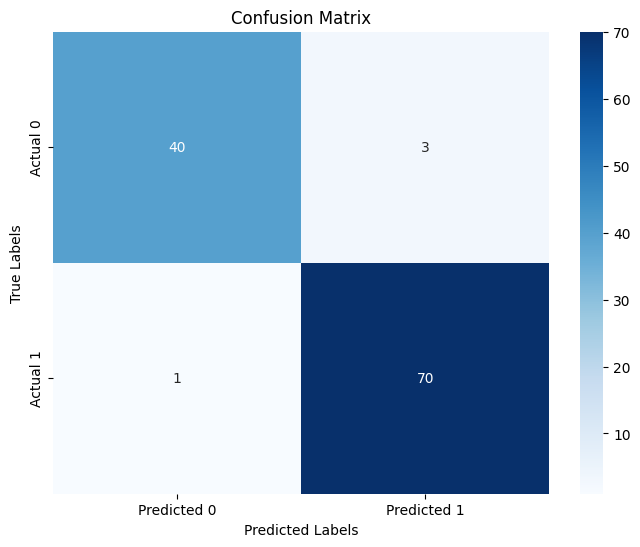

In [27]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming X_test, y_test, and rf_classifier are defined from previous code

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


###QUE.36 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [28]:


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),  # probability=True is required for stacking
    ('lr', LogisticRegression(random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=meta_learner, cv=5)


# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_classifier.predict(X_test)

# Calculate the accuracy of the stacking classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Classifier: {accuracy_stacking}")

# Train individual classifiers for comparison
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"Accuracy of {name}: {accuracy}")


Accuracy of Stacking Classifier: 0.865
Accuracy of dt: 0.875
Accuracy of svm: 0.845
Accuracy of lr: 0.855


###QUE.37 Train a Random Forest Classifier and print the top 5 most important features.

In [29]:



import numpy as np

# Assuming 'rf_classifier' and 'data' are defined from the previous code block.
# If not, load the data and train the classifier as shown in QUE.23

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get the indices of the top 5 most important features
top_5_indices = np.argsort(feature_importances)[::-1][:5]

# Print the top 5 most important features
print("Top 5 most important features:")
for i in top_5_indices:
    print(f"{data.feature_names[i]}: {feature_importances[i]}")


Top 5 most important features:
worst area: 0.15389236463205394
worst concave points: 0.14466326620735528
mean concave points: 0.10620998844591638
worst radius: 0.07798687515738047
mean concavity: 0.06800084191430111


###QUE.38 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [30]:


from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.9565217391304348
Recall: 0.822429906542056
F1-score: 0.8844221105527639


###QUE.39 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

In [31]:


import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of max_depth values to test
max_depth_values = [None, 5, 10, 15, 20]
accuracy_scores = []

for max_depth in max_depth_values:
    # Create a Random Forest Classifier with the current max_depth
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)

    # Train the Random Forest Classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Max Depth: {max_depth}, Accuracy: {accuracy}")

# Analyze the results (e.g., plot accuracy vs. max_depth)
# You can use matplotlib or other plotting libraries to visualize the relationship
# between max_depth and accuracy.


Max Depth: None, Accuracy: 0.9649122807017544
Max Depth: 5, Accuracy: 0.9649122807017544
Max Depth: 10, Accuracy: 0.9649122807017544
Max Depth: 15, Accuracy: 0.9649122807017544
Max Depth: 20, Accuracy: 0.9649122807017544


###QUE.40 Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare Performance.

In [35]:


from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Regressor with Decision Tree as the base estimator
bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Bagging with Decision Tree MSE: {mse_dt}")

# Bagging Regressor with K-Nearest Neighbors as the base estimator
bagging_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=10, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Bagging with KNN MSE: {mse_knn}")

# Compare performance
if mse_dt < mse_knn:
    print("Bagging with Decision Tree performed better.")
else:
    print("Bagging with KNN performed better.")


Bagging with Decision Tree MSE: 7484.147276569565
Bagging with KNN MSE: 14688.318331938306
Bagging with Decision Tree performed better.


###QUE.41 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [5]:


from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc}")


ROC-AUC Score: 0.9952505732066819


###QUE.42 Train a Bagging Classifier and evaluate its performance using cross-validatio.

In [9]:


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Create a Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Evaluate the Bagging Classifier using cross-validation
cv_scores = cross_val_score(bagging_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")


Cross-validation scores: [0.95  0.9   0.895 0.895 0.86 ]
Mean Accuracy: 0.9
Standard Deviation: 0.028809720581775854


###QUE.43 Train a Random Forest Classifier and plot the Precision-Recall curve.

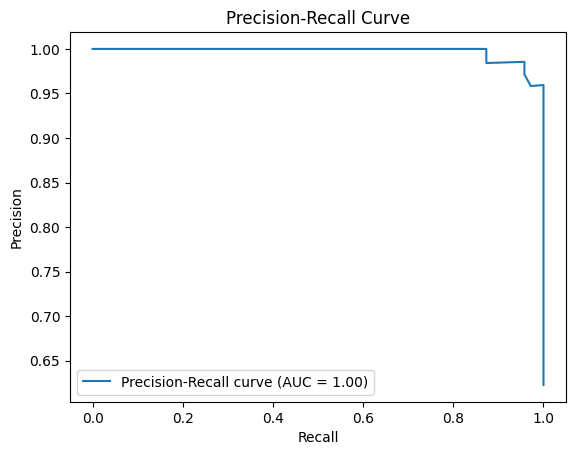

In [11]:


from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


###que.44 Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [13]:


from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the accuracy of the stacking classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Classifier: {accuracy_stacking}")

# Train individual classifiers for comparison
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")


Accuracy of Stacking Classifier: 0.89
Accuracy of rf: 0.9
Accuracy of lr: 0.855


###QUE.45 Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [15]:


from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bootstrap sample ratios to try
bootstrap_ratios = [0.5, 0.7, 0.9, 1.0]

for ratio in bootstrap_ratios:
    # Create a Bagging Regressor
    bagging_regressor = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=10,
        max_samples=ratio,  # Set the bootstrap ratio
        random_state=42
    )

    # Train the Bagging Regressor
    bagging_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = bagging_regressor.predict(X_test)

    # Evaluate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE with bootstrap ratio {ratio}: {mse}")


MSE with bootstrap ratio 0.5: 9103.131600547757
MSE with bootstrap ratio 0.7: 8296.725506026647
MSE with bootstrap ratio 0.9: 8687.871066191065
MSE with bootstrap ratio 1.0: 7484.147276569565


#THE END